<a href="https://colab.research.google.com/github/Nrup2002/Foreign-Direct-Investment-Analysis/blob/main/FDI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foreign Direct Investment Analysis

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Extracting CSV Data
FDI = pd.read_csv('/content/FDI data.csv')
FDI.head(3)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98


In [3]:
FDI.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

### Columns Details:

**Their are two types of Columns**
1. First Column is the 'Sector' Column in which there are 63 different Sectors that have received FDI from 2000-01 to 2016-17.
2. Other columns are Year-wise columns in which we can see how much different sectors received investment from 2000-01 to 2016-17.


In [4]:
Year = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
Sectors = ['Sector']

In [5]:
#Extracting Detailed Information
FDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [6]:
#Checking the null Values
FDI.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [7]:
#Creating Average Exchange Rate list 
Rates = [45.68,47.69,48.4,45.95,44.93,44.27,45.24,40.26,46,47.44,45.56,48,54.41,60.50,61.14,65.46,67.1]


### Converting American '$' to Indian '₹':

In [8]:
#Creating a function to Convert FDI's value from USD to INR  
def multiply_columns(df, col_list, num):
    for col in col_list:
        df[col] = df[col] * Rates[col_list.index(col)]/10
    return df

In [9]:
FDI_InUSD=FDI.copy() 
FDI_02 = multiply_columns(FDI, Year, Rates)

In [10]:
#FDI INFLOWS (Amount in ₹ Crores)
FDI_02.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,103.64792,67.43366,177.1924,37.26545,900.30734,660.19851,768.80856,4733.56950,4415.724,1991.91072,5003.12584,8573.472,7977.75743,3434.1615,2197.00476,2987.00526,9663.6078
1,MINING,6.02976,31.09388,48.6904,107.89060,44.57056,32.75980,29.94888,1788.99336,157.136,827.35360,362.24756,684.720,314.97949,77.0165,4184.36046,3408.30582,374.0825
2,POWER,408.47056,3612.23136,286.0924,124.47855,194.86141,321.79863,710.94660,3980.42568,4175.236,6033.37176,5794.18412,7931.424,2914.63488,6449.7840,4322.84256,5687.16480,7468.0958
3,NON-CONVENTIONAL ENERGY,0.00000,0.00000,8.2280,19.02330,5.70611,5.97645,11.03856,236.80932,579.048,2953.23488,976.80640,2170.416,6020.57532,2506.2125,3765.91830,5083.03446,5257.7547
4,COAL PRODUCTION,0.00000,0.00000,0.0000,0.18380,0.00000,40.46278,5.88120,56.68608,1.012,0.00000,0.00000,0.000,0.00000,17.9080,0.00000,0.00000,0.0000


### Unpivoting DataFrames from wide to long format:

In [11]:
# Unpivoting melt Dataframe
melt = pd.melt(FDI_InUSD, id_vars = Sectors, value_vars = Year, var_name='Year',
    value_name='FDI(US$ Million)',ignore_index=True)
melt

,Sector,Year,FDI(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,22.69
1,MINING,2000-01,1.32
2,POWER,2000-01,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,53.17
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,105.14


In [12]:
#Unpivoting melt01 Dataframe
melt01 = pd.melt(FDI_02, id_vars = Sectors, value_vars = Year, var_name='Year',
    value_name='FDI(₹ Crores)',ignore_index=True)
melt01=round(melt01,2)
melt01

,Sector,Year,FDI(₹ Crores)
0,METALLURGICAL INDUSTRIES,2000-01,103.65
1,MINING,2000-01,6.03
2,POWER,2000-01,408.47
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.77
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12485.50
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.49


In [13]:
# Merging the FDI(USD Million) column of melt Dataframe into melto1 Dataframe
Merged=melt01.merge(melt,how='left')
Merged

,Sector,Year,FDI(₹ Crores),FDI(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,103.65,22.69
1,MINING,2000-01,6.03,1.32
2,POWER,2000-01,408.47,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00,0.00
4,COAL PRODUCTION,2000-01,0.00,0.00
...,...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.77,53.17
1067,COIR,2016-17,0.00,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12485.50,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.49,105.14


In [14]:
#Sorting the Sectors and Year columns
Sorted = Merged.sort_values(['Sector','Year'], ignore_index=True)
Sorted

,Sector,Year,FDI(₹ Crores),FDI(US$ Million)
0,AGRICULTURAL MACHINERY,2000-01,16.63,3.64
1,AGRICULTURAL MACHINERY,2001-02,4.96,1.04
2,AGRICULTURAL MACHINERY,2002-03,65.24,13.48
3,AGRICULTURAL MACHINERY,2003-04,218.45,47.54
4,AGRICULTURAL MACHINERY,2004-05,0.00,0.00
...,...,...,...,...
1066,VEGETABLE OILS AND VANASPATI,2012-13,589.75,108.39
1067,VEGETABLE OILS AND VANASPATI,2013-14,130.38,21.55
1068,VEGETABLE OILS AND VANASPATI,2014-15,906.95,148.34
1069,VEGETABLE OILS AND VANASPATI,2015-16,224.00,34.22


In [15]:
#Repalcing some Long values of Sector Column to Short form
Sorted = Sorted[['Sector','FDI(₹ Crores)', 'FDI(US$ Million)'
                 ,]].replace(["CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects"
                              ,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)"
                              ,'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)']
                             ,["CONSTRUCTION DEVELOPMENT","SERVICES SECTOR",'TEA AND COFFEE'])

## Sector-wise Total FDI 2000-17:

In [16]:
#Grouping by Sector column to find Total FDI Inflow per Sector from FY2000-01 to FY2016-17  
Sectorwise_fdi = Sorted.groupby('Sector').sum()
Sectorwise_fdi.sort_values(by='FDI(US$ Million)',ascending=False)


,FDI(₹ Crores),FDI(US$ Million)
Sector,,
SERVICES SECTOR,316426.67,59476.49
COMPUTER SOFTWARE & HARDWARE,137296.48,24669.49
CONSTRUCTION DEVELOPMENT,115217.43,24293.09
TELECOMMUNICATIONS,131001.76,23946.01
AUTOMOBILE INDUSTRY,92637.98,16673.92
...,...,...
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28
COAL PRODUCTION,122.13,27.74
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.62,7.98


# Visualisation:

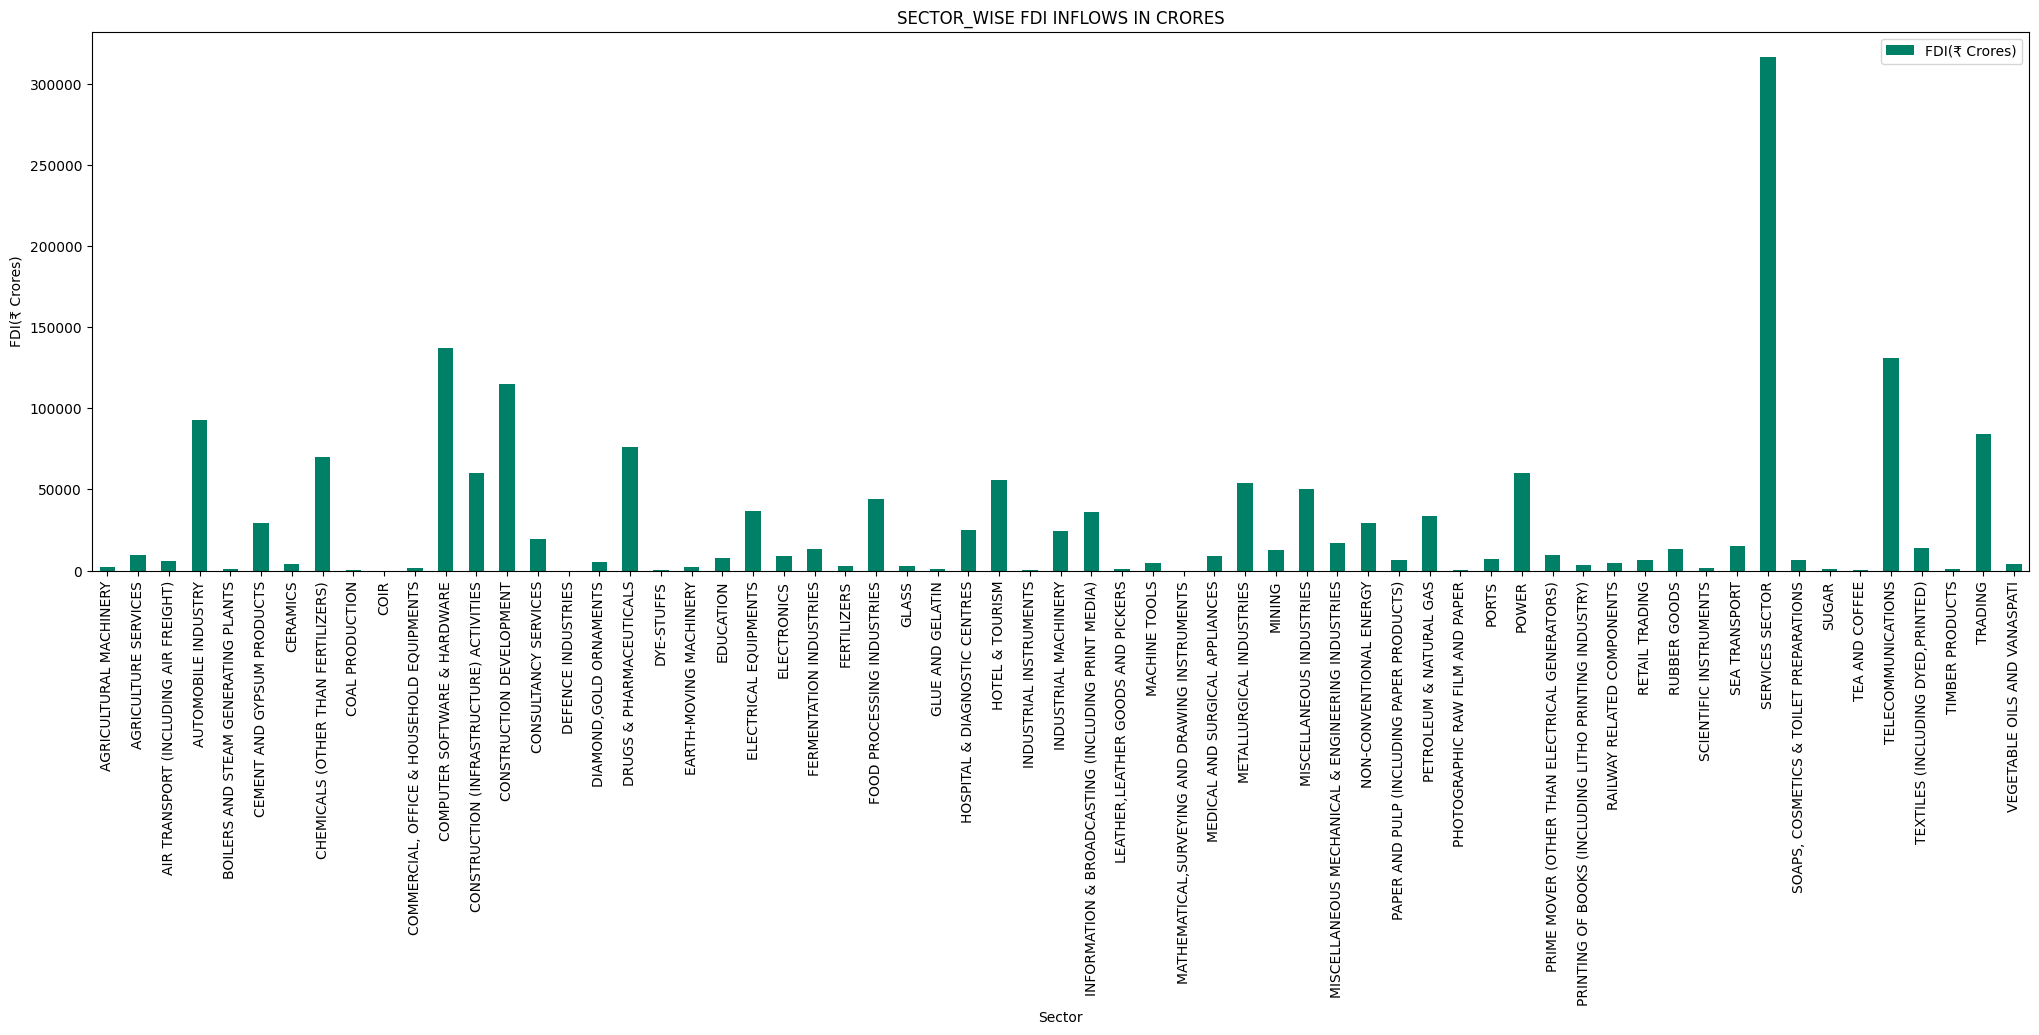

In [17]:
Sectorwise_fdi.plot(kind='bar',y='FDI(₹ Crores)',figsize = (25,7), legend= True, title='SECTOR_WISE FDI INFLOWS IN CRORES',ylabel='FDI(₹ Crores)',cmap='summer')
plt.show()

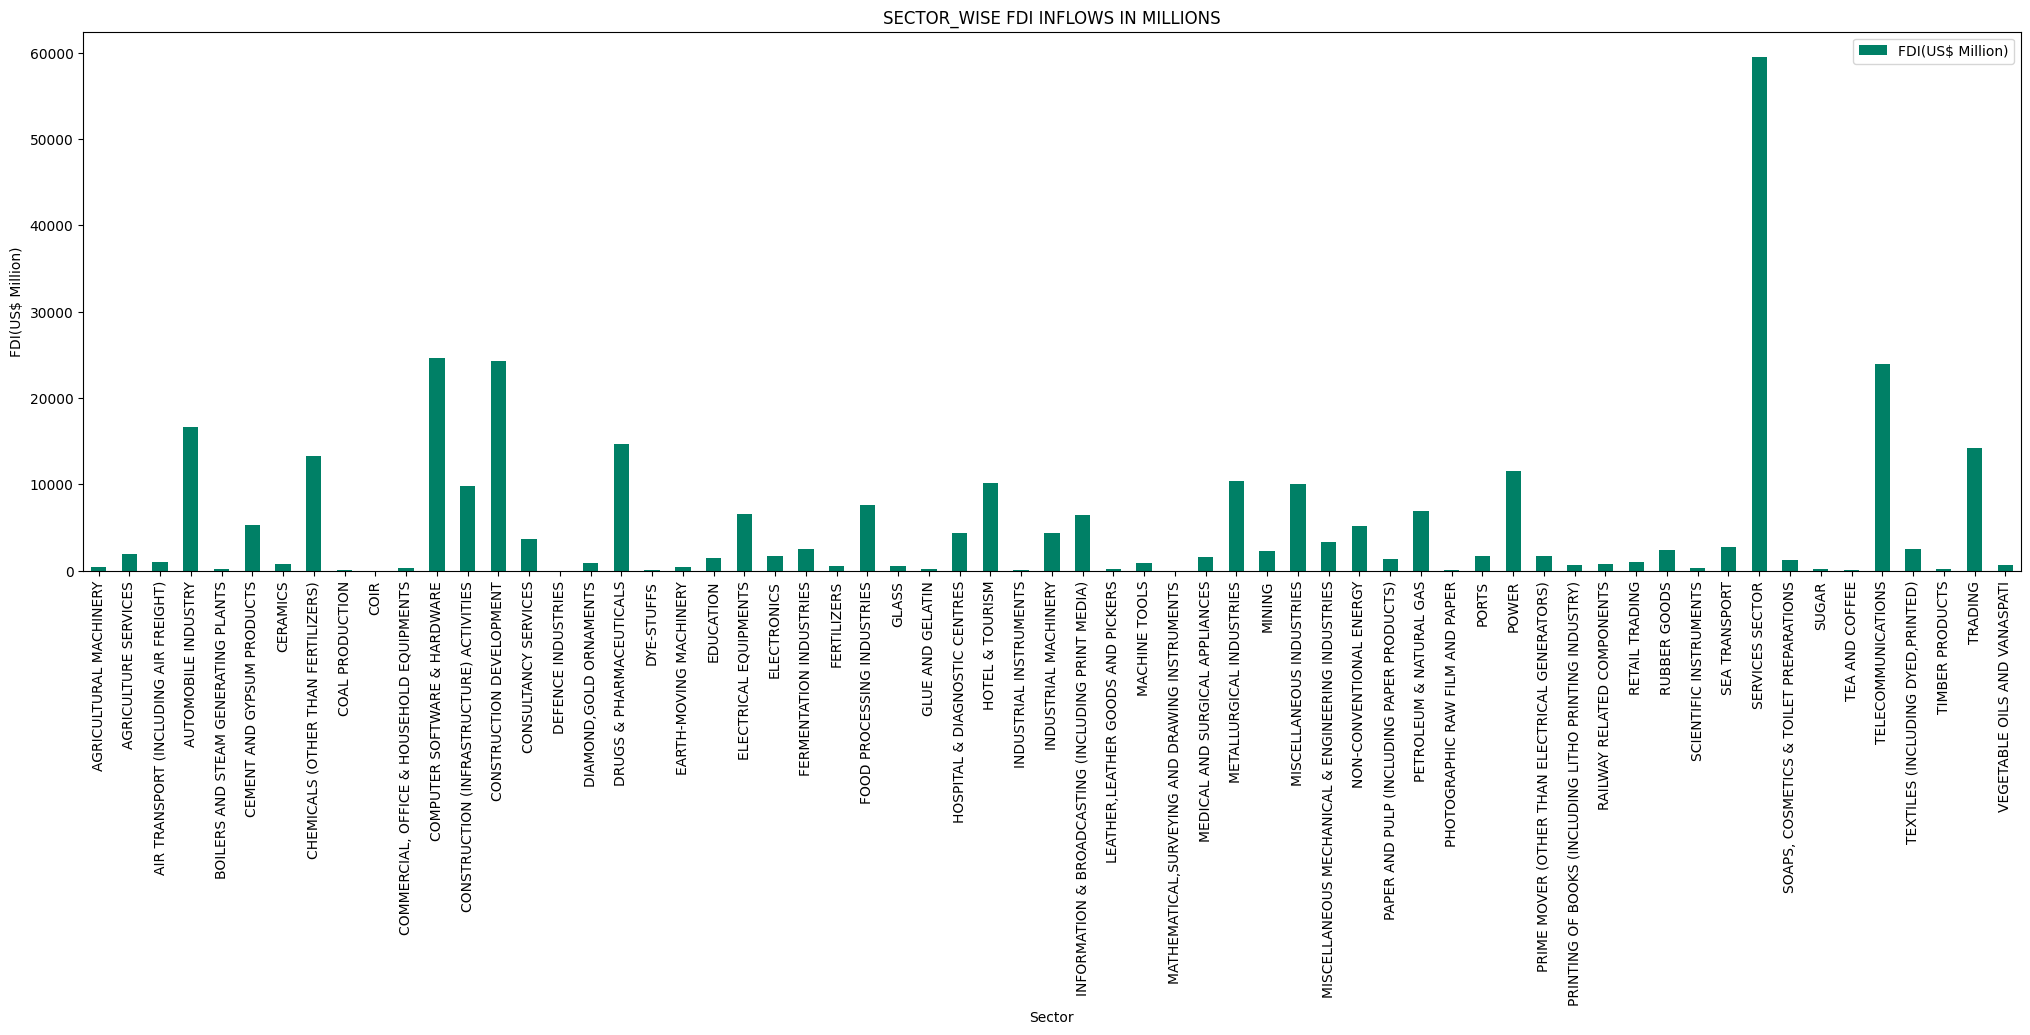

In [18]:
Sectorwise_fdi.plot(kind='bar',y='FDI(US$ Million)',figsize = (25,7), legend= True, title='SECTOR_WISE FDI INFLOWS IN MILLIONS' ,ylabel='FDI(US$ Million)',cmap='summer')
plt.show()

## Best & Worst Performing Sectors:
### TOP 10 SECTORS

In [19]:
#Top 10 and bottom 10 sectors 
Top_10_Sectors = Sectorwise_fdi.nlargest(10,['FDI(₹ Crores)'])


In [20]:
#Calculating percentage-wise FDI share among top 10 sectors and among all sectors 
Total_fdi = round(melt01['FDI(₹ Crores)'].sum(),2)
Sum = Top_10_Sectors['FDI(₹ Crores)'].sum()
Top_10_Sectors['In %age'] = round(Top_10_Sectors['FDI(₹ Crores)']/Sum*100,2) 
Top_10_Sectors['%age to Total Inflows'] = round((Top_10_Sectors['FDI(₹ Crores)']/Total_fdi)*100,2)
Top_10_Sectors

,FDI(₹ Crores),FDI(US$ Million),In %age,%age to Total Inflows
Sector,,,,
SERVICES SECTOR,316426.67,59476.49,27.66,17.65
COMPUTER SOFTWARE & HARDWARE,137296.48,24669.49,12.00,7.66
TELECOMMUNICATIONS,131001.76,23946.01,11.45,7.31
CONSTRUCTION DEVELOPMENT,115217.43,24293.09,10.07,6.43
AUTOMOBILE INDUSTRY,92637.98,16673.92,8.10,5.17
TRADING,84502.09,14210.88,7.39,4.71
DRUGS & PHARMACEUTICALS,76411.49,14706.90,6.68,4.26
CHEMICALS (OTHER THAN FERTILIZERS),70068.76,13293.09,6.12,3.91
POWER,60416.03,11589.13,5.28,3.37


### Visualisation:

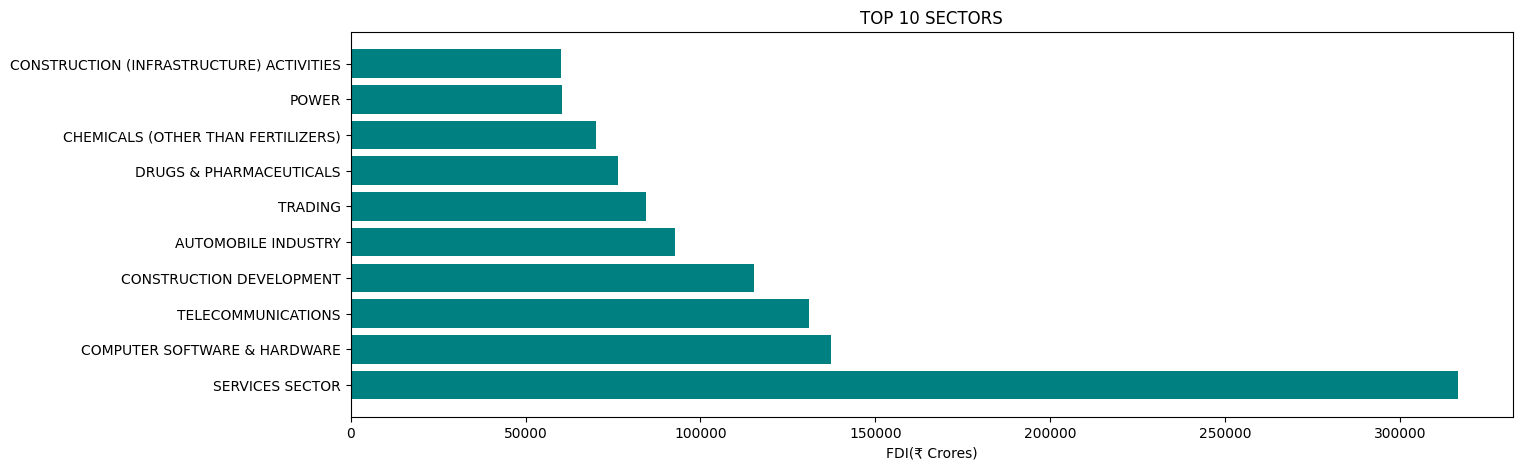

In [21]:
##Creating bar chart to visualise Total FDI inflow in top 10 sectors using Matplotlib

plt.figure(figsize=(15,5))
plt.barh(Top_10_Sectors.index,Top_10_Sectors['FDI(₹ Crores)'],color='Teal')
plt.title('TOP 10 SECTORS')
plt.xlabel('FDI(₹ Crores)')
plt.show()

### BOTTOM 5 SECTORS

In [22]:
#Calculating share among Bottom sectors and as a whole 
Bottom_5_Sectors = Sectorwise_fdi.nsmallest(5,['FDI(₹ Crores)'])
Sum = Bottom_5_Sectors['FDI(₹ Crores)'].sum()
Bottom_5_Sectors['In %age'] = round(Bottom_5_Sectors['FDI(₹ Crores)']/Sum*100,2)
Bottom_5_Sectors['%age to Total Inflows'] = round((Bottom_5_Sectors['FDI(₹ Crores)']/Total_fdi)*100,3)
Bottom_5_Sectors

,FDI(₹ Crores),FDI(US$ Million),In %age,%age to Total Inflows
Sector,,,,
COIR,21.64,4.06,4.42,0.001
DEFENCE INDUSTRIES,26.12,5.12,5.33,0.001
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.62,7.98,8.50,0.002
COAL PRODUCTION,122.13,27.74,24.93,0.007
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28,56.82,0.016


### Visualisation:

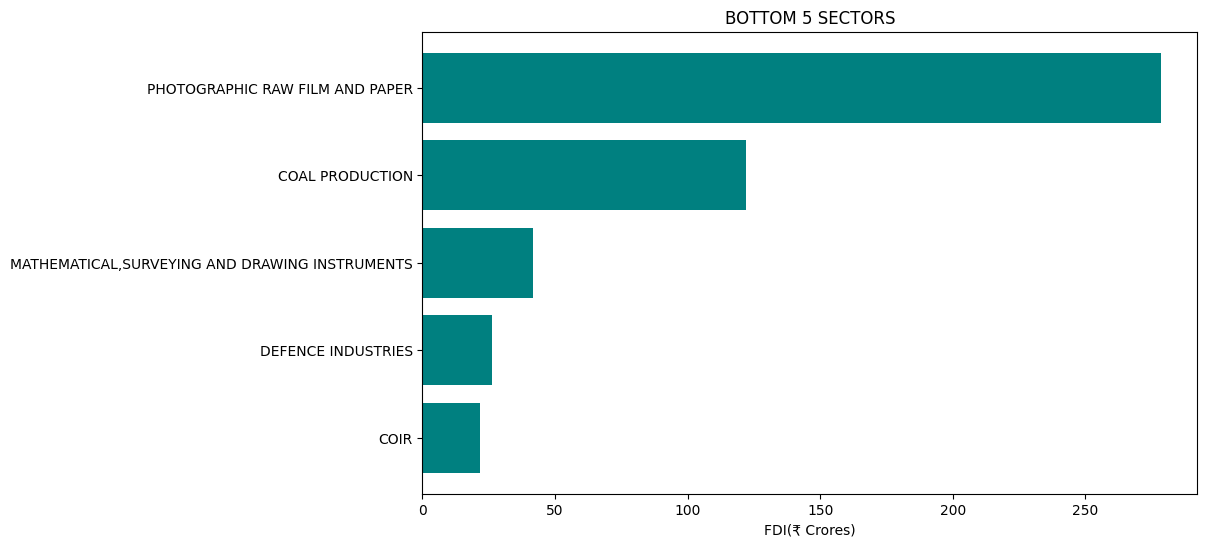

In [23]:
#Creating bar chart to visualise Total FDI inflow in Bottom 5 sectors using Matplotlib

plt.figure(figsize=(10,6))
plt.barh(Bottom_5_Sectors.index,Bottom_5_Sectors['FDI(₹ Crores)'],color = 'Teal')
plt.title('BOTTOM 5 SECTORS')
plt.xlabel('FDI(₹ Crores)')
plt.show()

# Year-wise Details:
#### Year-wise FDI Inflow 

In [24]:
#Creating Dataframe  
melt02 = melt01[['Year', 'FDI(₹ Crores)']]
melt02=round(melt02.groupby('Year').sum(),2)

In [25]:
#reating new column of % growth over previous year
melt02['% growth over previous year'] = round(melt02.pct_change()*100,2)

In [26]:
print('\n'+"*"*8+"Details on Variation of FDI INFLOW Year-wise"+'*'*8) #Year-wise FDI Inflow
melt02.fillna('-')


********Details on Variation of FDI INFLOW Year-wise********


,FDI(₹ Crores),% growth over previous year
Year,,
2000-01,10865.97,-
2001-02,19208.02,76.77
2002-03,13088.91,-31.86
2003-04,10053.15,-23.19
2004-05,14461.59,43.85
2005-06,24524.51,69.58
2006-07,56512.74,130.43
2007-08,98940.57,75.08
2008-09,144421.44,45.97


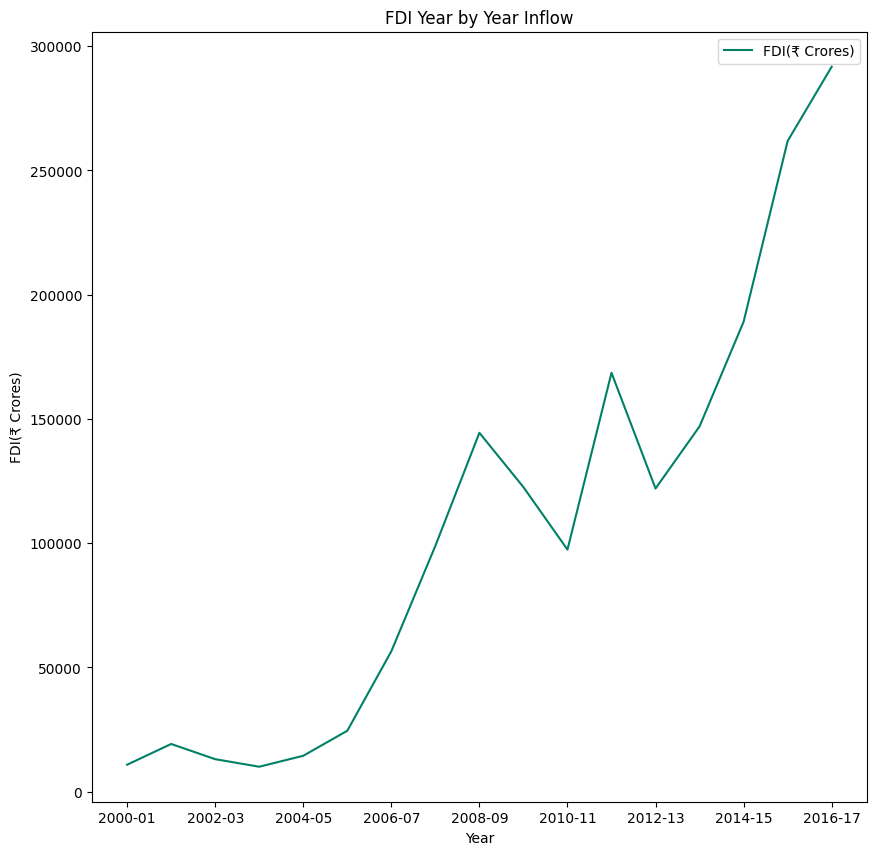

In [27]:
#plotting to show Year by Year FDI Inflow
melt02.plot.line(y='FDI(₹ Crores)',figsize=(10,10),cmap = 'summer')
plt.ylabel('FDI(₹ Crores)')
plt.title('FDI Year by Year Inflow')
plt.show()

##### The above graph shows the total amount of FDI inflows in India during the last 17 years i.e. 2000 to 2017.
The FDI inflow from 2000-2001 i.e. ₹10865.97Cr. in 2001-02 it was ₹19208.02Cr. It shows the Good result in the FDI inflows in India. Little bit
ups and downs in FDI inflows up to 2005-06, but after that great hike in the year 2007-08 and FDI was ₹98940.57Cr. In 2008-2009 there was a huge investment in FDI in ₹144390.03Cr.
But then there was a downfall in Inflow of FDI in two consecutive years 2009-2010 and 2010-2011, with figures 122558.27	 and
97421.29 respectively. We can analysis from the graph that in the year 2011-2012 the inflow of FDI was second highest of last 15 years
i.e. 168298.80.Year 2012-13 and 2013-14 the FDI inflow fluctuated from 121984.32 to 147010.90respectively. In last Financial Year i.e.2016-2017 the amount of FDI Inflow were ₹291608.67Cr which is the highest FDI inflow in last 17 years.

# Conclusion:

##### The Sectoral composition of FDI over the period of April 2000 to June 2017, we can find that the largest recipient of such investment is service sector (Financial and non-financial services). The share of this sector in FDI flows is 17 % of the inflow total foreign direct investment.
###### The foreign investors are interested in mainly financial services due its profit generating advantage. This sector gives scope for the foreign investor to takes back the profits to the home country. As service sector the services are consumed in the host country and there by generating outflow of funds from the host country.

###### Their is very low interset towards sectors like Coir, Defence Industries, Mathematical,surveying and drawing Instruments, Coal Production and there are around 28 to 30 sectors where share is less.  


In [28]:
#Saving as Excel file for further Use
#Merged.to_csv('FDI_data.csv')